In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm

In [ ]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


<Axes: >

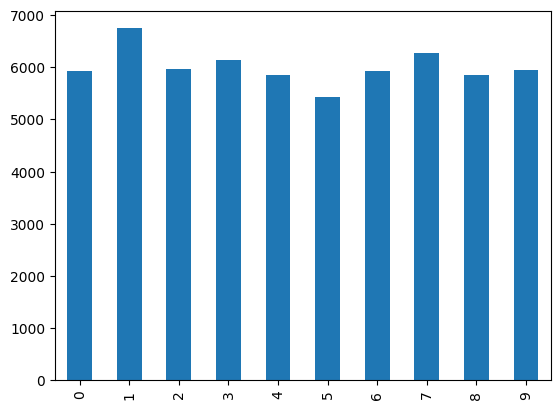

In [ ]:
pd.Series(ytrain).value_counts().sort_index().plot(kind = 'bar')

In [ ]:
xtrain = xtrain/255
ytrain = tf.keras.utils.to_categorical(ytrain)

In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
#Input layer
model.add(tf.keras.layers.Input((28,28),name = 'Input'))

#Flatten Layer
model.add(tf.keras.layers.Flatten(name = 'Flatten'))

#Hidden layers
model.add(tf.keras.layers.Dense(32,activation = 'relu',name = 'Hidden1'))
model.add(tf.keras.layers.Dense(32,activation = 'relu',name = 'Hidden2'))
model.add(tf.keras.layers.Dense(16,activation = 'relu',name = 'Hidden3'))

#output layer
model.add(tf.keras.layers.Dense(10,activation = 'softmax',name = 'Output'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 32)                25120     
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Hidden3 (Dense)             (None, 16)                528       
                                                                 
 Output (Dense)              (None, 10)                170       
                                                                 
Total params: 26874 (104.98 KB)
Trainable params: 26874 (104.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [ ]:
batch_size = 32

In [ ]:
chkpt = tf.keras.callbacks.ModelCheckpoint('mnist')

In [ ]:
model.fit(x = xtrain, y = ytrain,batch_size = batch_size, epochs = 15, validation_split = 0.1,callbacks = [chkpt])

Epoch 1/15
1688/1688 [==============================] - 6s 3ms/step - loss: 1.0957 - acc: 0.6556 - val_loss: 0.3803 - val_acc: 0.8933
Epoch 2/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3798 - acc: 0.8910 - val_loss: 0.2563 - val_acc: 0.9268
Epoch 3/15
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2982 - acc: 0.9139 - val_loss: 0.2169 - val_acc: 0.9373
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2557 - acc: 0.9253 - val_loss: 0.1876 - val_acc: 0.9477
Epoch 5/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2265 - acc: 0.9338 - val_loss: 0.1705 - val_acc: 0.9508
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2035 - acc: 0.9401 - val_loss: 0.1690 - val_acc: 0.9518
Epoch 7/15
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1851 - acc: 0.9454 - val_loss: 0.1548 - val_acc: 0.9565
Epoch 8/15
1688/1688 [==============================] - 12s 7m

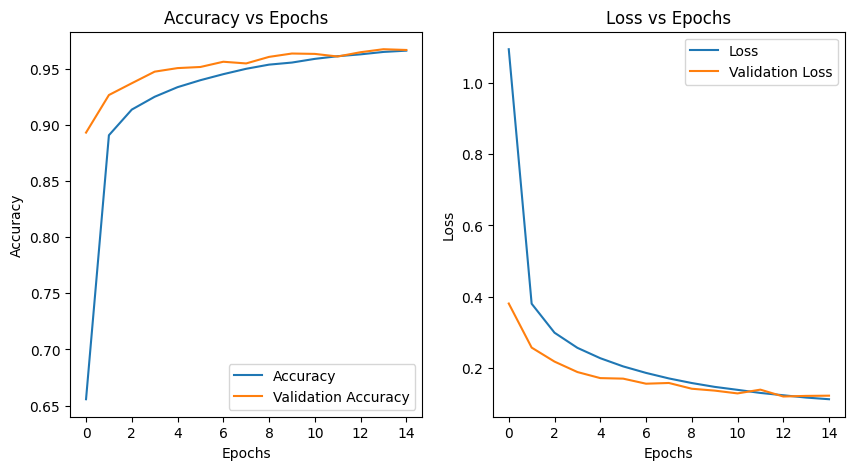

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(model.history.history['acc'],label = 'Accuracy')
plt.plot(model.history.history['val_acc'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
load_model = tf.keras.models.load_model('mnist')

In [ ]:
ypred = []
for i in tqdm(xtest):
  img = np.expand_dims(i,axis =0)
  pred = load_model.predict(img,verbose = 0)
  pred = pred.argmax()
  ypred.append(pred)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report

In [ ]:
accuracy_score(ytest,ypred)# The train accuracy of 96.64 and test accuracy of 95.63 are very close hence we can say that the model is not overfitting

0.9563

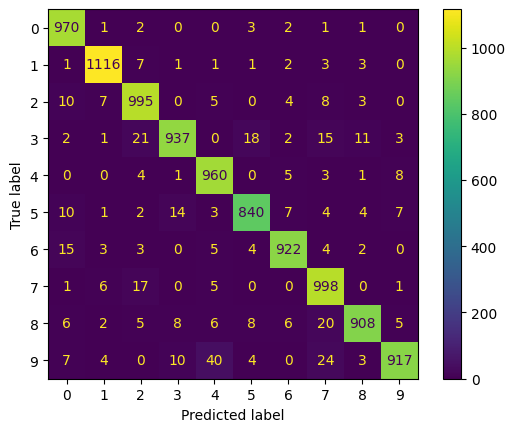

In [ ]:
cm = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
'''
as per the confusion matrix
1. model is predicting 1 most accurately
2. Model is most confused with 5, 8 and 9
3. 5 is mostly getting mixed up with 3,0,6 and 9
4. 8 is confused with 7,3 and 5
5 while 9 is mixed up with 4,7 and 3
'''

In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.96      0.93      0.95      1010
           4       0.94      0.98      0.96       982
           5       0.96      0.94      0.95       892
           6       0.97      0.96      0.97       958
           7       0.92      0.97      0.95      1028
           8       0.97      0.93      0.95       974
           9       0.97      0.91      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
#Let's use a diffrent learning rate and batch_size and see the performance

In [ ]:
new_batch = 16
lr = 0.01

In [ ]:
del model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=lr),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['acc'])

In [ ]:
model.fit(x = xtrain, y = ytrain,batch_size = new_batch, epochs = 15, validation_split = 0.1)

Epoch 1/15
3375/3375 [==============================] - 9s 3ms/step - loss: 0.7002 - acc: 0.7880 - val_loss: 0.2675 - val_acc: 0.9262
Epoch 2/15
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2907 - acc: 0.9151 - val_loss: 0.2014 - val_acc: 0.9432
Epoch 3/15
3375/3375 [==============================] - 8s 2ms/step - loss: 0.2260 - acc: 0.9349 - val_loss: 0.1818 - val_acc: 0.9478
Epoch 4/15
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1891 - acc: 0.9452 - val_loss: 0.1444 - val_acc: 0.9600
Epoch 5/15
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1649 - acc: 0.9519 - val_loss: 0.1355 - val_acc: 0.9603
Epoch 6/15
3375/3375 [==============================] - 8s 2ms/step - loss: 0.1482 - acc: 0.9568 - val_loss: 0.1329 - val_acc: 0.9622
Epoch 7/15
3375/3375 [==============================] - 7s 2ms/step - loss: 0.1338 - acc: 0.9608 - val_loss: 0.1297 - val_acc: 0.9620
Epoch 8/15
3375/3375 [==============================] - 9s 3ms

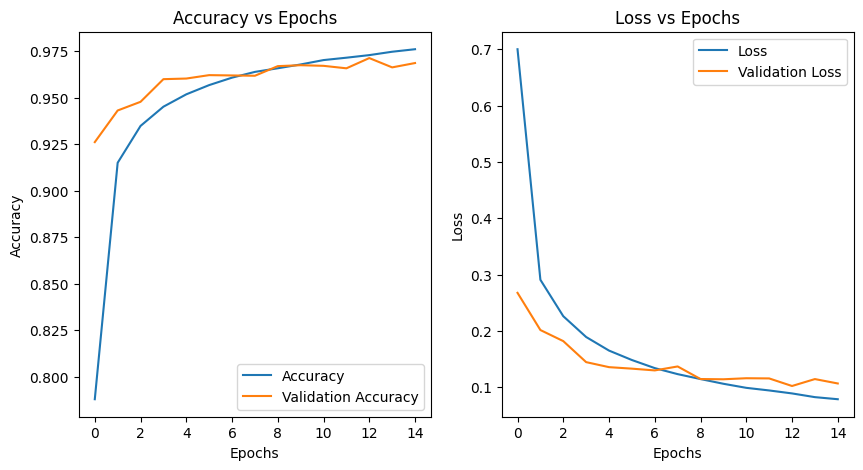

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(model.history.history['acc'],label = 'Accuracy')
plt.plot(model.history.history['val_acc'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
#with decreasing batch size the graph becomes more jittery but accuraccy is slightly improved